In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
class Point:
    def __init__(self, 
                 x_pos:float=None, 
                 y_pos:float=None, 
                 is_border:bool=False, 
                 is_airfoil:bool=False, 
                 U_infinity:float=30):
        self.x_pos = x_pos
        self.y_pos = y_pos
        self.is_border = is_border
        self.is_airfoil = is_airfoil
        self.U_infinity = U_infinity
        self.streamline = 0
        self.del_streamline_del_x_value = 0
        self.del_streamline_del_y_value = 0
        #self.del_2_streamline_del_x_value = 0
        #self.del_2_streamline_del_y_value = 0
        
    def set_streamline(self, streamline):
        if self.is_airfoil:
            streamline = 0
        self.streamline = streamline
        
    def get_del_streamline_del_x(self):
        if self.is_border or self.is_airfoil:
            return 0
        return self.del_streamline_del_x_value
    
    def set_del_streamline_del_x(self, stream_line):
        if (not self.is_airfoil) and (not self.is_border):
            self.del_streamline_del_x_value = stream_line
    
    def get_del_streamline_del_y(self):
        if self.is_border:
            return self.U_infinity
        elif self.is_airfoil:
            return 0
        return self.del_streamline_del_y_value
    
    def set_del_streamline_del_y(self, stream_line):
        if (not self.is_airfoil) and (not self.is_border):
            self.del_streamline_del_y_value = stream_line
            
    
            
p = Point()


max error:  1.0
iteration:  1

max error:  1.0000000000634799
iteration:  2

max error:  1.0000000004250988
iteration:  3

max error:  1.0000000019236466
iteration:  4

max error:  1.0000000066800518
iteration:  5

max error:  1.0000000197078143
iteration:  6

max error:  1.0000000519241723
iteration:  7

max error:  1.0000001257451139
iteration:  8

max error:  1.0000002850990255
iteration:  9

max error:  1.000000612844084
iteration:  10

max error:  1.0000012603336788
iteration:  11

max error:  1.0000024965518506
iteration:  12

max error:  1.0000047882684717
iteration:  13

max error:  1.0000089286582672
iteration:  14

max error:  1.0000162406595503
iteration:  15

max error:  1.000028894252057
iteration:  16

max error:  1.0000503955451503
iteration:  17

max error:  1.000086332528925
iteration:  18

max error:  1.0001455010097007
iteration:  19

max error:  1.0002415895604717
iteration:  20

max error:  1.000395681424043
iteration:  21

max error:  1.0006399448805772
iteration

C:\Users\guilh\AppData\Local\Temp\ipykernel_16048\895016988.py:70: UserWarning: The following kwargs were not used by contour: 'interpolation'
  plt.contour(mesh_values, levels=levels, colors='k', linestyles='solid', linewidths=2, alpha=0.7,


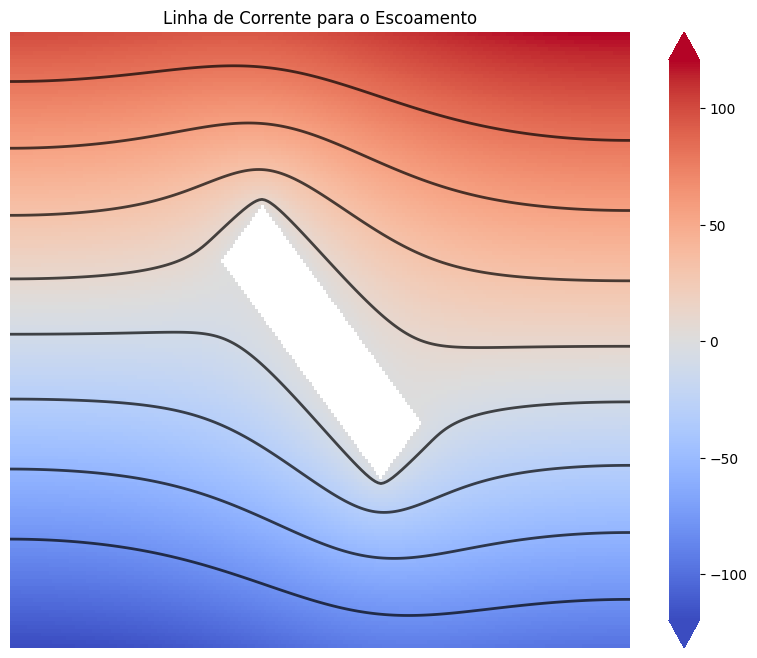

In [46]:
class Mesh:
    def __init__(self, delta:float = 0.01, rotation_angle:float=0, U_infinity:float=30):
        self.delta = delta
        self.lambda_value = 1.85
        self.tolerance = 0.01
        self.rotation_angle = rotation_angle*np.pi/180
        self.U_infinity = U_infinity
        self._preprocess()
    
    def _preprocess(self):
        mesh_width = 11
        mesh_heigth = 8
        airfoil_width = 1
        airfoil_height = 4
        self.num_of_iterations = 0
        self.rotation_matrix = np.array([[-np.sin(self.rotation_angle), np.cos(self.rotation_angle)],
                                         [-np.cos(self.rotation_angle), -np.sin(self.rotation_angle)]])
        
        airfoil_center = np.array([mesh_width/2, mesh_heigth/2])
        new_system_center = self.rotation_matrix@airfoil_center        
        self.p1 = new_system_center + np.array([airfoil_width/2, airfoil_height/2]) 
        self.p2 = new_system_center + np.array([-airfoil_width/2, -airfoil_height/2]) 
        
        self.num_of_cols = int(mesh_width/self.delta)    
        self.num_of_rows = int(mesh_heigth/self.delta)    
        self.mesh = [[None]*self.num_of_cols for _ in range(self.num_of_rows)]
        for c in range(self.num_of_cols):
            for r in range(self.num_of_rows):
                new_x = self.delta * c
                new_y = self.delta * r
                new_point = Point(x_pos = new_x, y_pos = new_y)
                is_airfoil = self.is_in_airfoil(new_point)
                new_point.is_airfoil = is_airfoil
                if(r == 0 or c == 0) or (r == (self.num_of_rows-1) or c == (self.num_of_cols-1)):
                    new_point.is_border = True
                self.mesh[r][c] = new_point
        
        
    def is_in_airfoil(self, point):
        x_pos = point.x_pos
        y_pos = point.y_pos
        position_in_new_system = self.rotation_matrix@np.array([x_pos, y_pos])
        new_x, new_y = position_in_new_system[0], position_in_new_system[1]
        in_x = (self.p1[0]>new_x and self.p2[0]<new_x)
        in_y = (self.p1[1]>new_y and self.p2[1]<new_y)
        if in_x and in_y:
            return True
        return False
    
    def plot_mesh(self): 
        mesh = [[None]*self.num_of_cols for _ in range(self.num_of_rows)]
        for c in range(self.num_of_cols):
            for r in range(self.num_of_rows):
                point = self.mesh[r][c]
                mesh[r][c] = not point.is_airfoil
        plt.imshow(mesh, cmap='gray', interpolation='nearest')
        plt.title('Posição do Aerofólio')
        plt.axis('off')
        plt.show()
    
    def plot_streamline(self):
        mesh_values = self.get_mesh_values()  
        mesh_values = np.array(mesh_values)
        mask = np.zeros_like(mesh_values, dtype=bool)
        mask[mesh_values == 0] = True
        plt.figure(figsize=(10, 8))
        sns.heatmap(mesh_values, annot=False, cmap='coolwarm', linewidths=0, mask=mask, cbar_kws={'extend': 'both'})
        nonzero_values = mesh_values[mesh_values != 0]
        levels = np.percentile(nonzero_values, np.linspace(0, 100, num=10))  
        plt.contour(mesh_values, levels=levels, colors='k', linestyles='solid', linewidths=2, alpha=0.7,
                    interpolation='bilinear', extent=(0, mesh_values.shape[1], 0, mesh_values.shape[0]))
        plt.title('Linha de Corrente para o Escoamento')
        plt.axis('off')
        plt.show() 
        
        
    def get_mesh_values(self):  
        mesh = [[None]*self.num_of_cols for _ in range(self.num_of_rows)]
        for row_id in range(self.num_of_rows): 
            for col_id in range(self.num_of_cols):   
                mesh[row_id][col_id] = self.mesh[row_id][col_id].streamline
        return mesh
        
    def apply_overelaxing(self, old_value, calculated_value):
        new_value = self.lambda_value*calculated_value + (1-self.lambda_value)*old_value
        try:
            error = np.absolute((new_value-old_value)/new_value)
        except:
            return 0, 0
        return new_value, error
    
    def calculate_point_is_border(self):
        calculated_value = 0            
        if self.upper_point is None:
            if self.left_point is None: 
                calculated_value = (2*self.right_point.streamline + 
                                    2*self.lower_point.streamline + 
                                    2*self.delta*self.U_infinity)/4

            elif self.right_point is None: 
                calculated_value = (2*self.left_point.streamline + 
                                    2*self.lower_point.streamline + 
                                    2*self.delta*self.U_infinity)/4
                
            else:
                calculated_value = (self.left_point.streamline +
                                    self.right_point.streamline +
                                    2*self.lower_point.streamline + 
                                    2*self.delta*self.U_infinity)/4
        elif self.lower_point is None:
            if self.left_point is None: 
                calculated_value = (2*self.right_point.streamline + 
                                    2*self.upper_point.streamline 
                                    -2*self.delta*self.U_infinity)/4
            elif self.right_point is None: 
                calculated_value = (2*self.left_point.streamline + 
                                    2*self.upper_point.streamline
                                    -2*self.delta*self.U_infinity)/4
            else:
                calculated_value = (self.left_point.streamline +
                                    self.right_point.streamline +
                                    2*self.upper_point.streamline
                                    -2*self.delta*self.U_infinity)/4
        elif self.left_point is None and ((self.upper_point is not None) and (self.lower_point is not None)):
            calculated_value = (2*self.right_point.streamline 
                                +self.lower_point.streamline 
                                + self.upper_point.streamline)/4
        elif self.right_point is None and ((self.upper_point is not None) and (self.lower_point is not None)):
            calculated_value = (2*self.left_point.streamline 
                                +self.lower_point.streamline 
                                + self.upper_point.streamline)/4
        
        return calculated_value
    
    def iter(self, row_id, col_id):
        if row_id == 0:
            self.upper_point = None
        else: 
            self.upper_point = self.mesh[row_id-1][col_id]
        if row_id == (self.num_of_rows-1):
            self.lower_point = None
        else:
            self.lower_point = self.mesh[row_id+1][col_id]
            
        if col_id == 0:
            self.left_point = None
        else:
            self.left_point = self.mesh[row_id][col_id-1]
        if col_id == (self.num_of_cols-1):
            self.right_point = None
        else:
            self.right_point = self.mesh[row_id][col_id+1]
        
        center_point = self.mesh[row_id][col_id]
        old_streamline_value = center_point.streamline
        if center_point.is_airfoil: 
            return 0
        elif center_point.is_border:
            calculated_streamline_value = self.calculate_point_is_border()        
        else:            
            calculated_streamline_value = (self.upper_point.streamline + 
                                self.left_point.streamline + 
                                self.lower_point.streamline + 
                                self.right_point.streamline)/4
            #print('c',calculated_streamline_value)
        new_streamline_value, error = self.apply_overelaxing(
                        old_streamline_value,calculated_streamline_value)
        (self.mesh[row_id][col_id]).set_streamline(new_streamline_value)
        
        return error
            
        
    def simul(self):
        max_error = np.inf
        num_of_cols = len(self.mesh[0])    
        num_of_rows = len(self.mesh)   
        while((max_error > self.tolerance) or (self.num_of_iterations>10000)): 
            temp_error = 0
                
            for row_id in range(num_of_rows): 
                for col_id in range(num_of_cols):   
                    
                    #print('\n',row_id,col_id)
                    error = self.iter(row_id,col_id)
                    if error > temp_error:
                        temp_error = error
                    #print((self.mesh[row_id][col_id]).streamline, error)
            self.num_of_iterations+=1
            max_error = temp_error
            print('\nmax error: ', max_error)
            print('iteration: ', self.num_of_iterations)
        
        
        
    

        
        
        
        
        
m = Mesh(rotation_angle=45, delta = 0.05)
mesh = m.mesh
#m.plot_mesh()
m.simul()
m.plot_streamline()
